<a href="https://www.kaggle.com/code/aayushsin7a/bank-churn-binary-classification?scriptVersionId=160873263" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

1. # Import the required library

In [1]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import pandas as pd 
# Set the maximum number of displayed columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
# Set the maximum column width for display
pd.set_option('display.max_colwidth', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import folium

import warnings
warnings.filterwarnings("ignore")

print("All the libraries loaded successfully")



/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv
All the libraries loaded successfully


2. # Read the dataset

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")


In [3]:
# Display these dataset for a quick overview 
train.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
print("Training set shape: ", train.shape)
print("Test set shape: ", test.shape)

Training set shape:  (165034, 14)
Test set shape:  (110023, 13)


Note that the test set has one column less than training set, the Exited column. This is because Exited is our response variable, or sometimes called a target variable. Our job is to analyse the data in the training set and predict if an customer Exits or stays in the test set.

In [6]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

3. # Data Dictionary

In [7]:
import pandas as pd

# Define the data dictionary
data_dict = {
    'Column Name': ['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
                    'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
                    'IsActiveMember', 'EstimatedSalary', 'Exited'],
    'Description': ['Unique identifier for each record.',
                    'Unique identifier for each customer.',
                    'Last name of the customer.',
                    'The credit score of the customer, a numerical measure of creditworthiness.',
                    'The geographical location or country of the customer.',
                    'The gender of the customer.',
                    'The age of the customer.',
                    'The number of years the customer has been with the bank or a similar institution.',
                    'The account balance of the customer.',
                    'The number of financial products the customer has with the bank.',
                    'Whether the customer has a credit card (binary: 1 for yes, 0 for no).',
                    'Whether the customer is an active member (binary: 1 for yes, 0 for no).',
                    'The estimated salary of the customer.',
                    'Whether the customer has exited or closed their account with the bank (binary: 1 for yes, 0 for no).']
}

# Create a DataFrame from the data dictionary
df_data_dict = pd.DataFrame(data_dict)

# Display the DataFrame in a tabular format
df_data_dict.head(14)


,Column Name,Description
0,id,Unique identifier for each record.
1,CustomerId,Unique identifier for each customer.
2,Surname,Last name of the customer.
3,CreditScore,"The credit score of the customer, a numerical measure of creditworthiness."
4,Geography,The geographical location or country of the customer.
5,Gender,The gender of the customer.
6,Age,The age of the customer.
7,Tenure,The number of years the customer has been with the bank or a similar institution.
8,Balance,The account balance of the customer.
9,NumOfProducts,The number of financial products the customer has with the bank.


In [8]:
# What about submission? 
ss = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
print(ss.head())

       id  Exited
0  165034     0.5
1  165035     0.5
2  165036     0.5
3  165037     0.5
4  165038     0.5


In [9]:
ss.shape

(110023, 2)

So, our final dataframe that is to be submitted should look something like this, 110023 rows and 2 columns, one for id and one for Exited.

4. # EDA 

> Exploratory data analysis is the process of visualising and analysing data to extract insights. In other words, we want to summarise important characteristics and trends in our data in order to gain a better understanding of our dataset.

In [10]:
# Non-null count and data types of the training and test set

train.info()
print('-'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB
----------------------------------------
<class 'pandas.core.frame.DataFra

In [11]:
# Missing data in training set by columns

train.isnull().sum().sort_values(ascending = False)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

5. # Summary statistics for training set  

In [12]:


train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Index(['Surname', 'Geography', 'Gender'], dtype='object')
Value counts of Geography : 
Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64



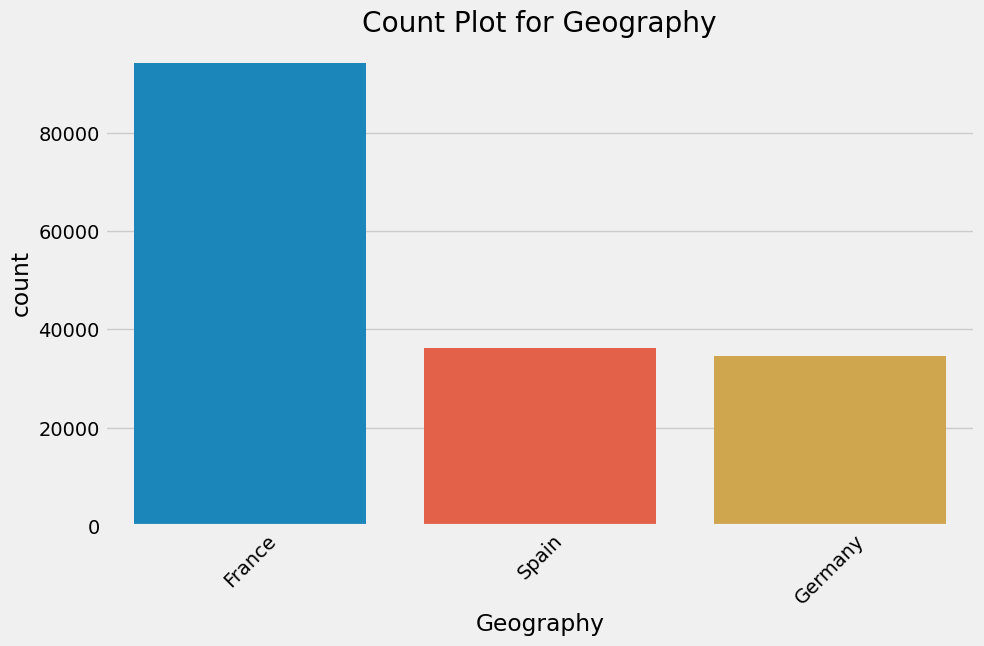

Value counts of Gender : 
Gender
Male      93150
Female    71884
Name: count, dtype: int64



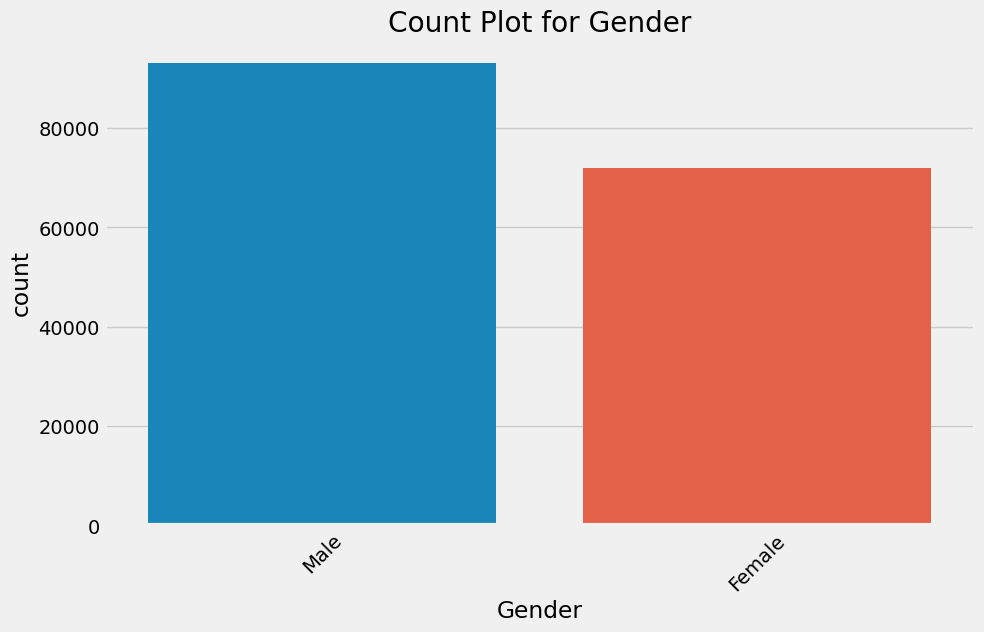

In [13]:
# Extract categorical columns
categorical_columns = train.select_dtypes(include=['object']).columns
print(categorical_columns)

categorical_columns = categorical_columns[~categorical_columns.isin(['Surname'])]

# Loop through categorical columns 
for column in categorical_columns:
  print(f"Value counts of {column} : \n{train[column].value_counts()}\n")
  # Plot count plot
  plt.figure(figsize=(10, 6))
  sns.countplot(x=column, data=train, order=train[column].value_counts().index)
  plt.title(f'Count Plot for {column}')
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

In [14]:
# Mean of survival by sex

train[['Gender', 'Exited']].groupby('Gender', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

,Gender,Exited
0,Female,0.279687
1,Male,0.159055


Text(0.5, 1.0, 'Exit Probability by Gender')

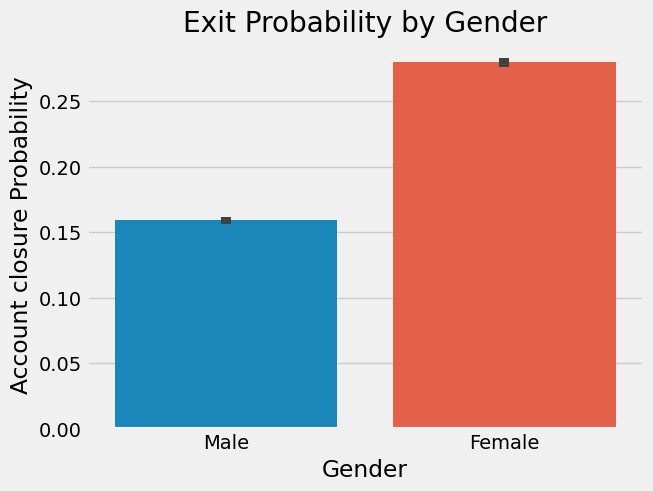

In [15]:
sns.barplot(x = 'Gender', y ='Exited', data = train)
plt.ylabel('Account closure Probability')
plt.title('Exit Probability by Gender')

# Comment: Female customers are more likely to exit

In [16]:
# Mean of survival by sex

train[['Geography', 'Exited']].groupby('Geography', as_index = False).mean().sort_values(by = 'Exited', ascending = False)

,Geography,Exited
1,Germany,0.378952
2,Spain,0.172176
0,France,0.165282


Text(0.5, 1.0, 'Exit Probability by Geography')

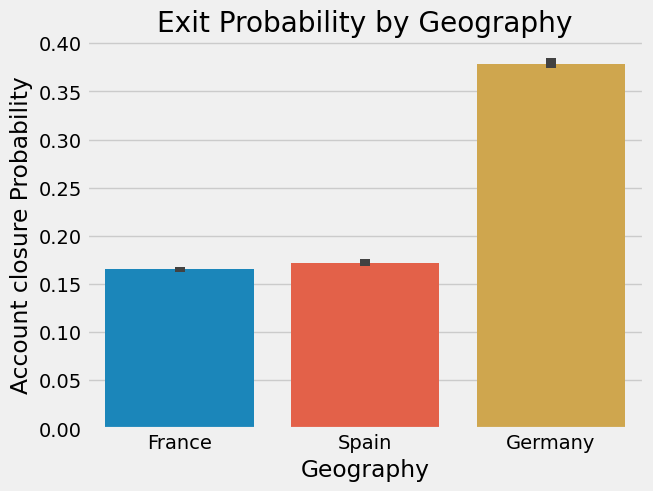

In [17]:
sns.barplot(x = 'Geography', y ='Exited', data = train)
plt.ylabel('Account closure Probability')
plt.title('Exit Probability by Geography')

# Comment: German customers are more likely to exit